In [1]:
import pandas as pd 
import numpy as np
import os


# EDA

train.csv : user,item, time

<br>
directors.tsv : item, director identifier


In [2]:
data_path='../../../data/train'
train_df= pd.read_csv(os.path.join(data_path,'train_ratings.csv'))

In [3]:
train_df.info()
train_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [4]:
num_False=0
for i in train_df.groupby('user')['time'].is_monotonic_increasing:
    if i==False:
        num_Flase+=1
print(num_False)

0


In [5]:
num_user=train_df['user'].nunique()
num_item=train_df['item'].nunique()

print('number of users:',num_user)
print('num_item: ', num_item)

sparsity_ratio = 1 - len(train_df)/(num_user*num_item)
print('sparsity_ratio: ', sparsity_ratio)


number of users: 31360
num_item:  6807
sparsity_ratio:  0.9758536052697853


In [6]:
directors_df= pd.read_csv(os.path.join(data_path,'directors.tsv'),sep='\t')
generes_df= pd.read_csv(os.path.join(data_path,'genres.tsv'),sep='\t')
titles_df= pd.read_csv(os.path.join(data_path,'titles.tsv'),sep='\t')
writers_df= pd.read_csv(os.path.join(data_path,'writers.tsv'),sep='\t')
years_df=pd.read_csv(os.path.join(data_path,'years.tsv'),sep='\t')


In [7]:
years_df.info()
years_df.head()
num_item_from_year=years_df['item'].nunique()
num_year=years_df['year'].nunique()
print("item 갯수: ", num_item_from_year)
print("year 갯수: ", num_year)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB
item 갯수:  6799
year 갯수:  93


In [8]:
years_df.describe()

,item,year
count,6799.000000,6799.000000
mean,26630.017503,1992.174732
std,32187.872806,19.052568
min,1.000000,1922.000000
25%,3052.500000,1985.000000
50%,6879.000000,1999.000000
75%,49840.000000,2006.000000
max,119141.000000,2014.000000


In [9]:
np.mean(years_df['year'])
(years_df['year']).mode()[0]

2006

### year 사이드 인포메이션의 히스토그램
 train data랑 합쳐서 생각해볼필요있음..


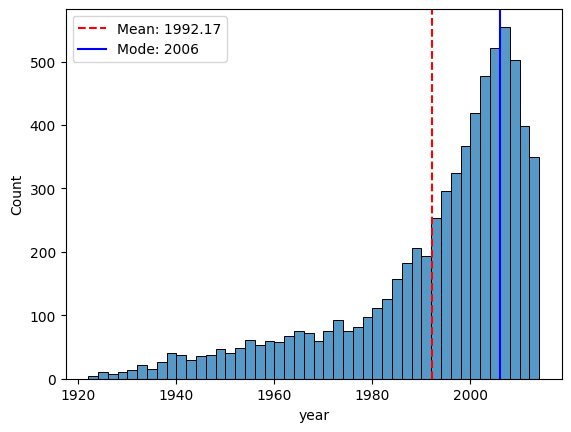

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='year',data=years_df,bins=46)
x_mean=np.mean(years_df['year'])
x_mode=(years_df['year']).mode()[0]
plt.axvline(x_mean, color='red', linestyle='--', label=f'Mean: {x_mean:.2f}')
plt.axvline(x_mode, color='blue', linestyle='-', label=f'Mode: {x_mode}')
plt.legend()
# Show the plot
plt.show()

In [11]:
writers_df.info()
num_writers= writers_df['writer'].nunique()
num_items= writers_df['item'].nunique()
print(f'writer 몇명? : {num_writers}')
print(f'item 몇개? : {num_items}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB
writer 몇명? : 2989
item 몇개? : 5648


In [12]:
writers_df.head()

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [13]:
titles_df.info()
titles_df.head()
num_titles = titles_df['title'].nunique()
num_items= titles_df['item'].nunique()
print(f'title 몇개? : {num_titles}')
print(f'item 몇개? : {num_items}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB
title 몇개? : 6806
item 몇개? : 6807


In [14]:
num_len=set()
for i in titles_df['title']:
    if len(i.split('(')[-1])==6:
        print(i.split('(')[-1])
    num_len.add(len(i.split('(')[-1]))
print(num_len)

2007-)
{10, 5, 6}


In [ ]:
#directors_df= pd.read_csv(os.path.join(data_path,'directors.tsv'),sep='\t')
#generes_df= pd.read_csv(os.path.join(data_path,'genres.tsv'),sep='\t')

In [15]:
directors_df.info()
directors_df.head()
num_directors = directors_df['director'].nunique()
num_items= directors_df['item'].nunique()
print(f'director 몇명? : {num_directors}')
print(f'item 몇개? : {num_items}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB
director 몇명? : 1340
item 몇개? : 5503


In [16]:
generes_df.info()
generes_df.head()
num_directors = generes_df['genre'].nunique()
num_items= generes_df['item'].nunique()
print(f'generes 몇개? : {num_directors}')
print(f'item 몇개? : {num_items}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB
generes 몇개? : 18
item 몇개? : 6807


# train_df + side_information

## tran_df 의 활발한 유저 및 popular movie_ids 

In [16]:
active_user_ids= train_df.value_counts('user').index[:10]
popular_movie_ids = train_df.value_counts('item').index[:10]

print(active_user_ids, popular_movie_ids)

Index([8405, 54465, 24219, 32514, 91349, 131904, 34576, 99754, 31122, 118754], dtype='int64', name='user') Index([2571, 2959, 296, 318, 356, 4993, 7153, 5952, 593, 2858], dtype='int64', name='item')


In [17]:
train_directors=pd.merge(train_df,directors_df,on=['item'],how='left')
train_genres=pd.merge(train_df,generes_df,on=['item'],how='left')
train_titles=pd.merge(train_df,titles_df,on=['item'],how='left')
train_year=pd.merge(train_df,years_df,on=['item'],how='left')
train_writer=pd.merge(train_df,writers_df,on=['item'],how='left')

### train_writer 분포도확인

In [19]:

writer_id=train_writer.value_counts('writer').index[:10]

print ("Number of all unique writer ids: ", train_writer['writer'].nunique())

print ("\ntop 10 writer ids: \n", writer_id)

Number of all unique writer ids:  2989

top 10 writer ids: 
 Index(['nm0000184', 'nm0000233', 'nm0634240', 'nm0001392', 'nm0909638',
       'nm0004056', 'nm0744429', 'nm0101991', 'nm0254645', 'nm0000175'],
      dtype='object', name='writer')


In [20]:
train_writer.isnull().sum()

user           0
item           0
time           0
writer    312692
dtype: int64

### train_titles 분포도비교

In [21]:
title_id=train_titles.value_counts('title').index[:10]
print("Number of all unique title_id:", train_titles['title'].nunique())
print ("\ntop 10 titles: \n", title_id)

Number of all unique title_id: 6806

top 10 titles: 
 Index(['Matrix, The (1999)', 'Fight Club (1999)', 'Pulp Fiction (1994)',
       'Shawshank Redemption, The (1994)', 'Forrest Gump (1994)',
       'Lord of the Rings: The Fellowship of the Ring, The (2001)',
       'Lord of the Rings: The Return of the King, The (2003)',
       'Lord of the Rings: The Two Towers, The (2002)',
       'Silence of the Lambs, The (1991)', 'American Beauty (1999)'],
      dtype='object', name='title')


In [22]:
train_titles.isnull().sum()

user     0
item     0
time     0
title    0
dtype: int64

### train_director비교

In [23]:

director_id=train_directors.value_counts('director').index[:10]

print ("Number of all unique writer ids: ", train_directors['director'].nunique())

print ("\ntop 10 writer ids: \n", director_id)

Number of all unique writer ids:  1340

top 10 writer ids: 
 Index(['nm0000229', 'nm0000233', 'nm0634240', 'nm0000709', 'nm0001392',
       'nm0000217', 'nm0001054', 'nm0000116', 'nm0000399', 'nm0000631'],
      dtype='object', name='director')


In [24]:
train_directors.isnull().sum()

user             0
item             0
time             0
director    301445
dtype: int64

### train_years

In [25]:
train_df['item'].nunique()

6807

In [26]:
train_year.isnull().sum()
# train_year['year'].nunique()

user       0
item       0
time       0
year    1832
dtype: int64

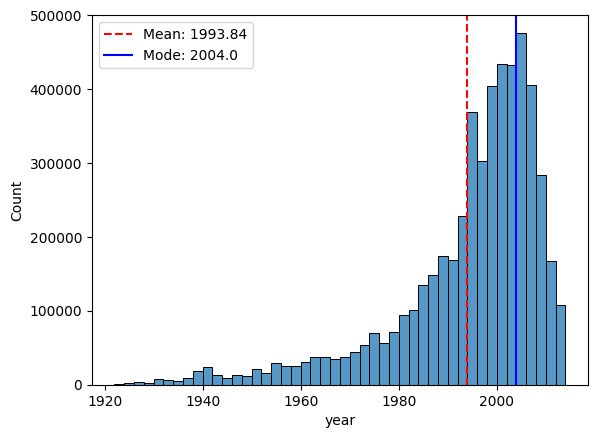

In [27]:
sns.histplot(x='year',data=train_year,bins=46)
x_mean=np.mean(train_year['year'])
x_mode=(train_year['year']).mode()[0]
plt.axvline(x_mean, color='red', linestyle='--', label=f'Mean: {x_mean:.2f}')
plt.axvline(x_mode, color='blue', linestyle='-', label=f'Mode: {x_mode}')
plt.legend()
# Show the plot
plt.show()

### train_df + genres


In [28]:
train_genres.isnull().sum()

user     0
item     0
time     0
genre    0
dtype: int64

In [29]:
sns.histplot(x='genre', data=genre_data)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

NameError: name 'genre_data' is not defined

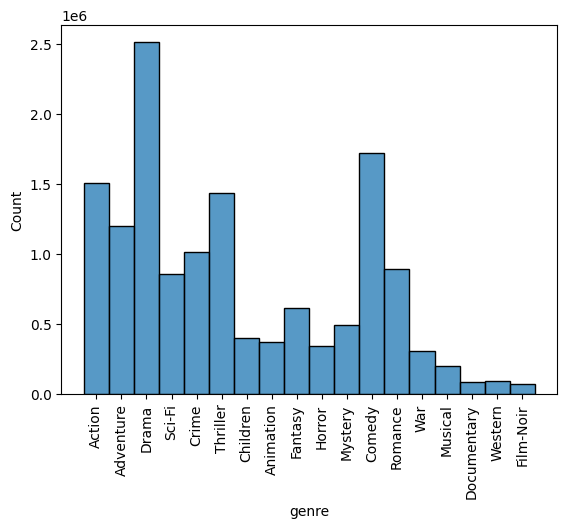

In [30]:
sns.histplot(x='genre', data=train_genres)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

### 시간 변환 및 한 유저당 본 장르 검색 -> 한 유저당 가장많이본 장르 mode() -> 뉴피처 가능
### 유저당 시간에따라 관측한 item갯수 -> num_user_watching /num_시간 -> 뉴피처가능? (이게 과연 static model일까? 시간의 의미를 담음)
### itme 당 시간에따라 관측된 유저인원 -> num_item_watched/ num_시간 -> 뉴피처가능? (이게 과연 static model 일까? 시간의 의미를 담음)

In [22]:
genres_frequency=dict()
genres_groupby=train_genres.groupby('user')
for user,group in genres_groupby:
    genres_frequency[user]=dict()
    inner_dict=genres_frequency[user]
    for genre in group['genre']:
        if genre in inner_dict:
            inner_dict[genre]+=1
        else:
            inner_dict[genre]=1
    genres_frequency[user] = dict(sorted(inner_dict.items(), key=lambda item: item[1], reverse=True))


In [36]:
# for user in genres_frequency.keys():
#     train_genres[train_gneres['user']==user]['popular_genre']=genres_frequency[user]
train_genres['most_popular_genre']=train_genres['user'].apply(lambda x: next(iter(genres_frequency[x].keys())))

In [38]:
train_genres.head()

,user,item,time,genre,most_popular_genre
0,11,4643,1230782529,Action,Sci-Fi
1,11,4643,1230782529,Adventure,Sci-Fi
2,11,4643,1230782529,Drama,Sci-Fi
3,11,4643,1230782529,Sci-Fi,Sci-Fi
4,11,170,1230782534,Action,Sci-Fi


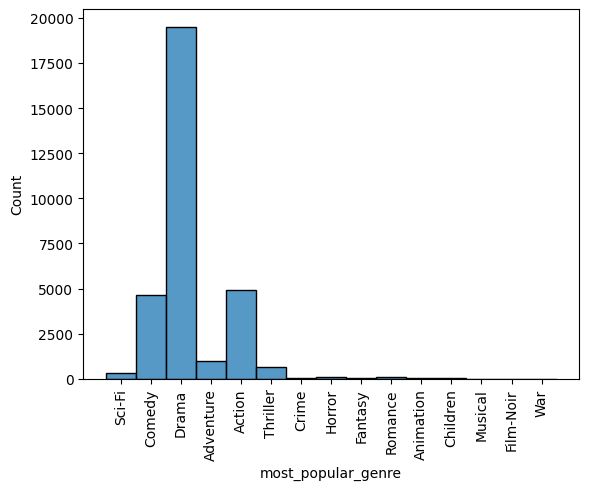

In [40]:
train_genres_duplicate = train_genres.drop_duplicates(subset=['user'])
sns.histplot(x='most_popular_genre', data=train_genres_duplicate)

# Rotate the x-axis labels
plt.xticks(rotation=90)
plt.show()

### 시간에 따른 한 특정 item관람갯수

In [18]:
import time
unix_time = 1230782529 # some random timestamp from dataset
converted_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(unix_time))

print ("initial unix-based timestamp: %s\nconverted time: %s"%(unix_time, converted_time))

initial unix-based timestamp: 1230782529
converted time: 2009-01-01 04:02:09


/tmp/ipykernel_702318/49788670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_df['time'] = old_df['time'].replace([old_time], new_time) # replace the time column


Text(0.5, 1.0, 'Statistics of item activity')

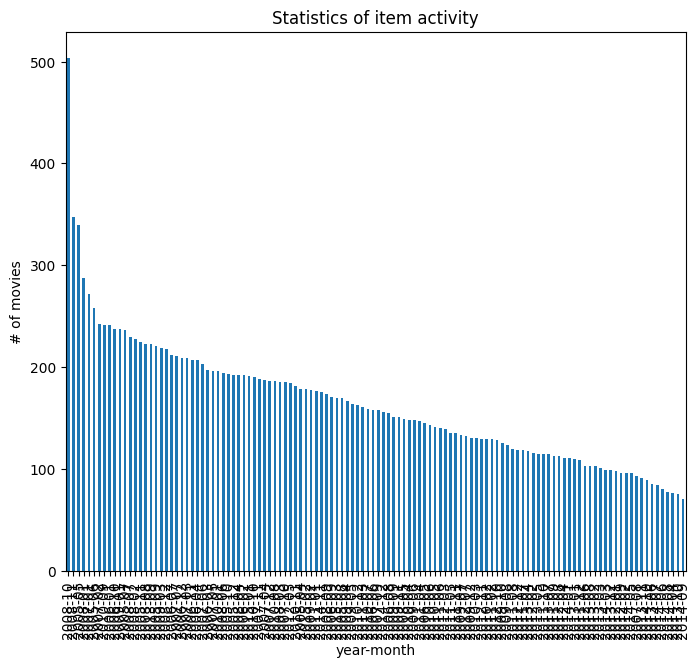

In [19]:
old_df = train_df[train_df['item'] == popular_movie_ids[0]] # Specific user id
converted_df = old_df

for old_time in old_df['time']:
    new_time = time.strftime('%Y-%m', time.localtime(old_time))
    converted_df['time'] = old_df['time'].replace([old_time], new_time) # replace the time column

converted_df['time'].value_counts().plot(kind = 'bar', figsize = (8,7))
plt.xlabel('year-month')
plt.ylabel('# of movies')
plt.title('Statistics of item activity')

In [21]:
old_df = train_df[train_df['item'] == popular_movie_ids[0]] # Specific user id
converted_df = old_df
converted_df

,user,item,time
82,11,2571,1230787515
666,25,2571,1277963409
863,31,2571,1424736532
911,35,2571,1164499279
1104,43,2571,1239308964
...,...,...,...
5152793,138456,2571,1183781077
5153515,138472,2571,1194038965
5153794,138473,2571,1274233742
5154122,138492,2571,1115296949


In [22]:
for old_time in old_df['time']:
    new_time = time.strftime('%Y-%m', time.localtime(old_time))
    converted_df['time'] = old_df['time'].replace([old_time], new_time) # 

/tmp/ipykernel_702318/2329884170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_df['time'] = old_df['time'].replace([old_time], new_time) #


<Axes: xlabel='time'>

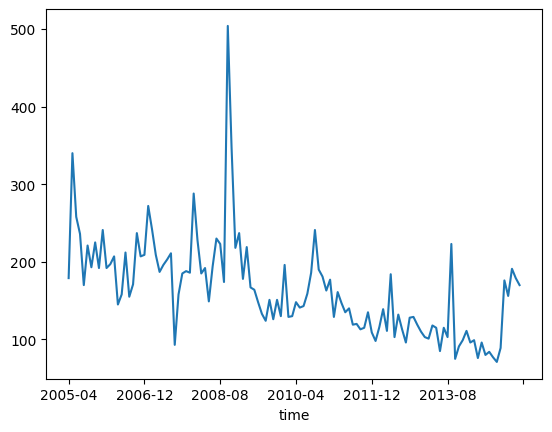

In [34]:
converted_df['time'].value_counts().sort_index().plot()b

In [38]:
old_df = train_df[train_df['user'] == active_user_ids[0]] # Specific user id
converted_df = old_df

for old_time in old_df['time']:
    new_time = time.strftime('%Y-%m', time.localtime(old_time))
    converted_df['time'] = old_df['time'].replace([old_time], new_time) # replace the time column

converted_df['time'].value_counts().sort_index()


/tmp/ipykernel_702318/1633325486.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_df['time'] = old_df['time'].replace([old_time], new_time) # replace the time column


time
2006-10    380
2006-11    254
2006-12     52
2007-01    400
2007-02    348
2007-03    105
2007-04    143
2007-05     53
2007-06    244
2007-07     39
2007-08     69
2007-09    149
2007-10    126
2007-11    133
2007-12      6
2008-01     40
2008-02     11
2008-03      4
2008-04     12
2008-05      9
2008-06      9
2008-07      7
2008-08     28
2008-09     12
2008-10     35
2008-11      6
2008-12      6
2009-01     16
2009-02      9
2009-03      9
2009-04      4
2009-05      2
2009-06      8
2009-09     33
2009-12     29
2010-01      3
2010-03      5
2010-10     15
2012-03      6
2012-05     89
2012-08      2
2013-01      1
2014-07      1
Name: count, dtype: int64

<Axes: xlabel='time'>

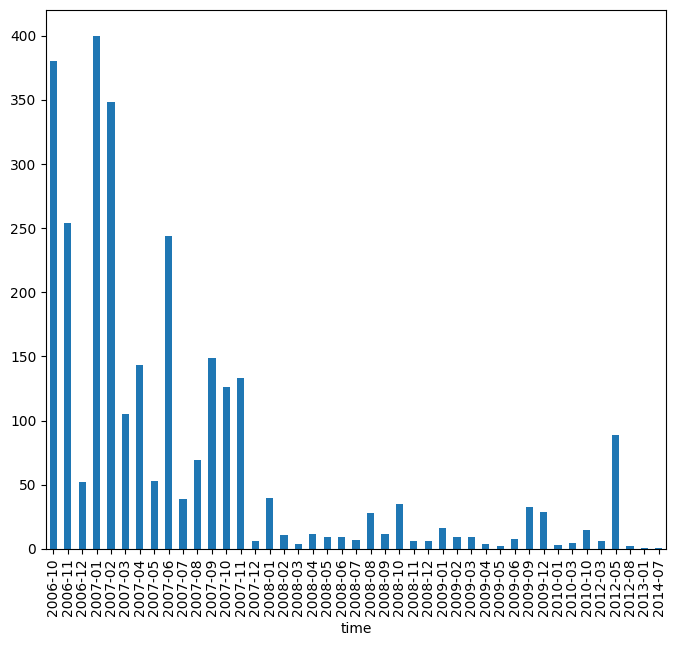

In [40]:
converted_df['time'].value_counts().sort_index().plot(kind = 'bar', figsize = (8,7))

In [47]:
from datetime import datetime

# Filter specific rows
old_df = train_df[train_df['user'] == active_user_ids[0]]  # Specific user id
converted_df = old_df.copy()

# Add the `is_weekend` column
converted_df['is_weekend'] = old_df['time'].apply(
    lambda t: 1 if datetime.fromtimestamp(t).weekday() >= 5 else 0
)

print(converted_df)

        user   item        time  is_weekend
315136  8405   1252  1160462492           0
315137  8405   1278  1160462504           0
315138  8405   2599  1160462620           0
315139  8405   3408  1160462658           0
315140  8405   2268  1160462698           0
...      ...    ...         ...         ...
318043  8405   1967  1336360450           0
318044  8405   2966  1344146938           1
318045  8405    356  1344220422           0
318046  8405  69685  1359355760           0
318047  8405  26547  1404813926           0

[2912 rows x 4 columns]


In [55]:
converted_df = train_df.copy()

# Add the `is_weekend` column
converted_df['is_weekend'] = train_df['time'].apply(
    lambda t: 1 if datetime.fromtimestamp(t).weekday() >= 5 else 0
)
converted_df['is_weekend'].value_counts().sort_index()

is_weekend
0    3618953
1    1535518
Name: count, dtype: int64

<Axes: xlabel='is_weekend'>

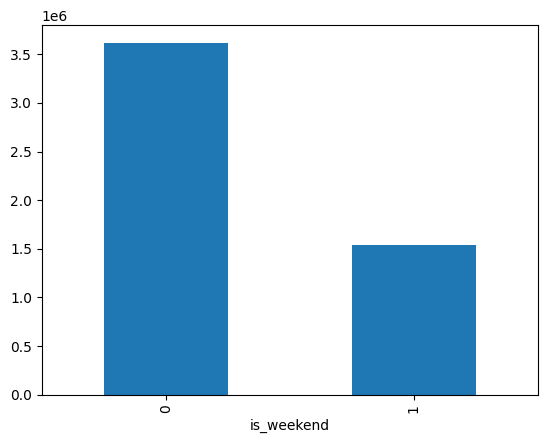

In [57]:
converted_df['is_weekend'].value_counts().sort_index().plot(kind='bar')

### imputation 어떻게할지 찾아보자 (year+ writer+ directors)